In [1]:
from mlhelper import MLHelper, pd
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
labels_dict = {
    0: {
        'name': 'malignant',
        'color': 'r',
        'marker': '^'
    },
    1: {
        'name': 'benign',
        'color': 'b',
        'marker': 'o'
    }
}
helper = MLHelper('Breast Cancer', labels_dict)
cancer_df = pd.DataFrame(
    data=dataset.data
    , columns=dataset.feature_names
)
cancer_df['target'] = dataset.target

[I 2025-04-27 02:42:29,110] A new study created in memory with name: no-name-cf57b465-8cb8-427e-9b0b-d08fbd77c275
[I 2025-04-27 02:42:29,349] Trial 0 finished with value: 0.9439806412583183 and parameters: {'n_neighbors': 16, 'weights': 'distance', 'algorithm': 'auto', 'leaf_size': 12, 'p': 1}. Best is trial 0 with value: 0.9439806412583183.
[I 2025-04-27 02:42:29,542] Trial 1 finished with value: 0.933817301875378 and parameters: {'n_neighbors': 26, 'weights': 'distance', 'algorithm': 'ball_tree', 'leaf_size': 14, 'p': 1}. Best is trial 0 with value: 0.9439806412583183.
[I 2025-04-27 02:42:29,696] Trial 2 finished with value: 0.9372655777374469 and parameters: {'n_neighbors': 1, 'weights': 'distance', 'algorithm': 'ball_tree', 'leaf_size': 44, 'p': 1}. Best is trial 0 with value: 0.9439806412583183.
[I 2025-04-27 02:42:29,736] Trial 3 finished with value: 0.9509376890502118 and parameters: {'n_neighbors': 8, 'weights': 'uniform', 'algorithm': 'auto', 'leaf_size': 46, 'p': 1}. Best is 

Best trial:
Accuracy: 0.9650937689050212
Best hyperparameters:  {'n_neighbors': 3, 'weights': 'uniform', 'algorithm': 'ball_tree', 'leaf_size': 45, 'p': 1}


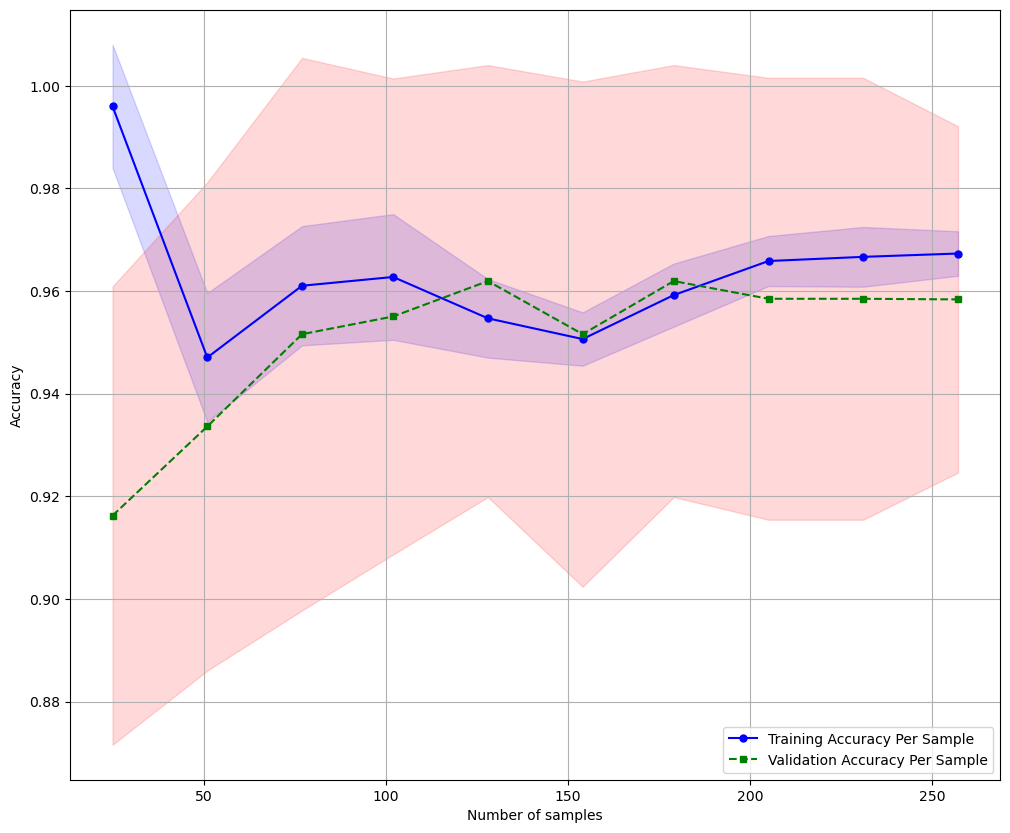

Confusion Matrix
[[ 58   6]
 [  0 107]]
Accuracy: 0.9649, Precision: 0.9469, Recall: 1.0000, F1: 0.9727, AUC:0.9717


In [2]:
outlier_params = {'eps': 0.5, 'min_samples': 8, 'n_jobs': -1}
X_train, X_test, y_train, y_test = helper.get_split_data(cancer_df, test_size=0.3, shuffle=True, stratify=True)
X_train_transformed = helper.get_transformed_features(X_train)
X_test_transformed = helper.get_transformed_features(X_test)
X_train_scaled, X_test_scaled = helper.get_scaled_data(X_train_transformed, X_test_transformed, y_train, y_test, 'mm')

df_train = X_train_scaled.copy()
df_train['target'] = y_train
df_train_outlier_removed = helper.remove_outliers(df_train, 'iqr', outlier_params)

helper.train_and_evaluate_model('lr', df_train_outlier_removed.iloc[:,:-1], X_test_scaled, df_train_outlier_removed.iloc[:,-1], y_test)